## Experiment 7
#### AIM : Linear Regression with Gradient Descent
##### To peform linear regression using gradient descent

#### Description
The idea of linear regression is to find a relationship between our target or dependent variable (y) and a set of explanatory variables ($x_1, x_2...$). This relatonship can then be used to predict other values.

In our case with one variable, this relationship is a line defined by parameters $\beta$ and the following form: $y = \beta_0 + \beta_1x$, where $\beta_0$ is our intercept.

This can be extended to multivariable regression by extending the equation in vector form: $y=X\beta$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('data.txt',names=['x','y'])
X_df = pd.DataFrame(df.x)
y_df = pd.DataFrame(df.y)
X_df.head()

,x
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598


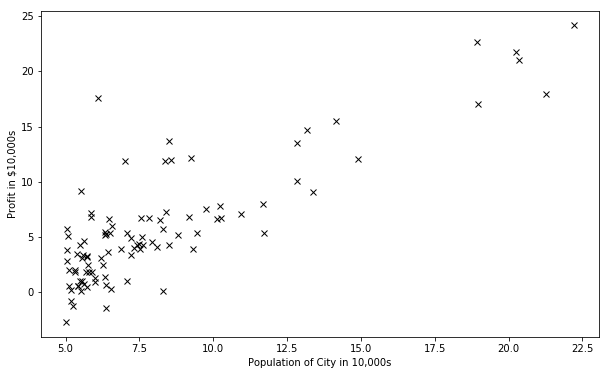

In [3]:
plt.figure(figsize=(10,6))
plt.plot(X_df,y_df,'kx')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

In [4]:

X_df['bias'] = 1
m = df.count()[0]
X = np.array(X_df)
y = np.array(y_df).flatten()
y.shape

(97,)

In [5]:
theta = np.array([0,0])
alpha = 0.01
iters = 1500


In [6]:
def cost_func(X,y,theta):
    m = len(y)
    return np.sum((X.dot(theta) -y)**2)/(2*m)
cost_func(X,y,theta)

32.072733877455676

In [7]:
def gradientDescent(X,y,theta,alpha,iters):
    m = len(y)
    cost_hist = [0]*(iters+1)
    for i in range(iters):
        cost_hist[i] = cost_func(X,y,theta)
        h = X.dot(theta)
        loss = h - y
        grad = X.T.dot(loss)/m
        theta = theta - alpha*grad
    
    cost_hist[iters] = cost_func(X,y,theta)
    return theta,cost_hist
t,c = gradientDescent(X,y,theta,alpha,iters)
t

array([ 1.16636235, -3.63029144])

In [8]:
print(np.array([3.5,1]).dot(t))
print(np.array([7,1]).dot(t))

0.4519767867701767
4.534245012944714


In [9]:
X_best_fit = np.linspace(0,25,20)
y_best_fit = [np.array([x,1]).dot(t) for x in X_best_fit]

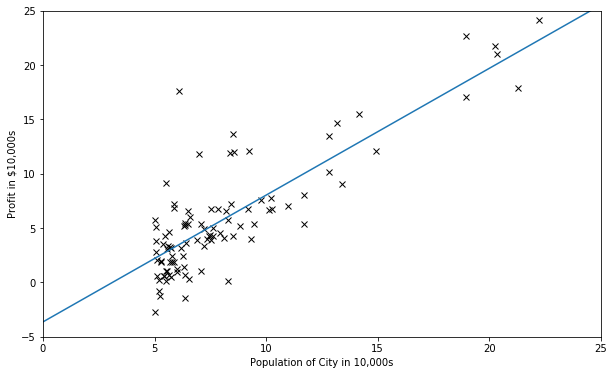

In [18]:
plt.figure(figsize=(10,6))
plt.plot(X_df.x,y_df,'kx')
plt.plot(X_best_fit,y_best_fit)
plt.axis([0,25,-5,25])
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()